# Convolutional neural networks (CNN) basics

Welcome to the `07_cnn_basics` notebook. This notebook is designed to showcase concepts and techniques in PyTorch, with a focus on convolutional neural networks (CNNs). CNNs are widely used in computer vision tasks such as image classification.

It explores topics such as loading and preprocessing image datasets, building and training a simple CNN model, evaluating its performance, and visualizing learned features. It also includes methods for improving the model using regularization techniques.

## Table of contents

1. [Understanding CNNs](#understanding-cnns)
2. [Setting up the environment](#setting-up-the-environment)
3. [Loading and preprocessing the dataset](#loading-and-preprocessing-the-dataset)
4. [Building a simple CNN model](#building-a-simple-cnn-model)
5. [Training the CNN model](#training-the-cnn-model)
6. [Evaluating the CNN model](#evaluating-the-cnn-model)
7. [Visualizing intermediate outputs and filters](#visualizing-intermediate-outputs-and-filters)
8. [Improving the model with regularization](#improving-the-model-with-regularization)
9. [Conclusion](#conclusion)

## Understanding CNNs

Convolutional Neural Networks (CNNs) are a specialized type of artificial neural network designed for handling structured grid-like data, such as images. They are commonly used in computer vision tasks, including image classification, object detection, and segmentation. CNNs excel at automatically capturing spatial hierarchies in the data through the use of convolutional operations, which make them particularly well-suited for tasks involving visual data.

### **Key building blocks of CNNs**

CNNs consist of a series of core components that work together to process input data and extract meaningful features:

#### **Convolutional layer**  
The convolutional layer is the core of any CNN architecture. It applies a set of filters (also called kernels) to the input data, such as an image. These filters move across the input, performing element-wise multiplication between the filter and local patches of the input data. The result is summed to produce a feature map, which captures the presence of certain patterns, such as edges or textures, in the image.

Several key ideas make convolutional layers efficient:
- **Local receptive field**: Neurons in CNNs are connected only to a small, localized region of the input data, preserving spatial relationships and reducing the number of parameters.
- **Shared weights**: All neurons in a feature map share the same set of weights, allowing CNNs to detect patterns anywhere in the image.
- **Strides**: The step size at which the filter moves across the input. Increasing the stride size reduces the spatial dimensions of the output feature maps.
- **Padding**: Zero padding is often applied around the border of the input to control the output size.

#### **Activation functions**  
After the convolution operation, an activation function introduces non-linearity to the network. This is crucial for CNNs because the convolution operation itself is linear, and non-linearity allows the network to model complex patterns in the data.

The most commonly used activation function in CNNs is the **ReLU** (Rectified Linear Unit). ReLU is favored because it is simple, effective, and helps mitigate the vanishing gradient problem, allowing networks to train faster.

#### **Pooling layers**  
Pooling layers downsample the spatial dimensions of the feature maps, reducing computational complexity and helping to prevent overfitting. Pooling is typically applied after the convolutional layer.

The two most common types of pooling are:
- **Max pooling**: Retains the maximum value from each patch of the feature map.
- **Average pooling**: Computes the average value of each patch.

Max pooling is more commonly used as it captures the most prominent features in a region of the image.

#### **Fully connected layers**  
Once the convolutional and pooling layers have extracted high-level features from the input data, fully connected layers perform the final classification or regression task. Each neuron in a fully connected layer is connected to every neuron in the previous layer. The last fully connected layer typically uses a **softmax** activation function to output probabilities across the different classes in a classification task.

### **Architectural properties of CNNs**

CNNs possess several architectural properties that make them highly effective for image-based tasks:

- **Parameter sharing**: By sharing weights in convolutional layers, CNNs can detect features like edges regardless of their location in the image, significantly reducing the number of parameters compared to fully connected networks.
- **Sparse connectivity**: Neurons in convolutional layers are connected to only a small subset of the input, which decreases the computational cost and improves efficiency.
- **Translation invariance**: CNNs are naturally invariant to translations within the input data. This allows them to recognize objects even if their position in the image changes.

### **Training a CNN**

The process of training a CNN is similar to that of a traditional neural network, involving backpropagation and gradient descent. The difference lies in the handling of convolutional layers and filters.

- **Forward pass**: The input (e.g., an image) is passed through the network, where each convolutional and pooling layer transforms it into a set of high-level feature maps.
- **Loss calculation**: The final output is compared to the true labels using a loss function, such as cross-entropy for classification tasks.
- **Backpropagation**: Gradients of the loss with respect to the weights in the convolutional and fully connected layers are computed using the chain rule, and the weights are updated to minimize the loss.

### **Popular CNN architectures**

Over the years, several CNN architectures have gained popularity due to their success in various challenges and applications:
- **LeNet**: One of the earliest CNN architectures, designed for digit classification.
- **AlexNet**: Pioneered deeper CNNs and won the ImageNet competition in 2012, sparking widespread interest in deep learning.
- **VGG**: Introduced deeper networks with small filters (3x3) and uniform layer structures.
- **ResNet**: Introduced residual connections, allowing for much deeper networks without the degradation of performance.

### **Challenges in CNNs**

Despite their success, CNNs have some limitations:
- **Data requirements**: CNNs require large amounts of labeled data to avoid overfitting and to generalize well to new data.
- **Computational cost**: Training deep CNNs on high-resolution images can be computationally expensive.
- **Lack of rotation invariance**: CNNs are not inherently invariant to rotations or changes in scale, although this can be addressed through data augmentation techniques.

### **Applications of CNNs**

CNNs are widely used in many tasks beyond image classification, including:
- **Object detection**: CNN-based architectures like YOLO and Faster R-CNN detect objects in images and videos.
- **Image segmentation**: Architectures such as U-Net and fully convolutional networks (FCNs) are used for tasks like semantic segmentation.
- **Generative tasks**: Generative adversarial networks (GANs) use CNNs to generate realistic images.
- **Video analysis**: CNNs, often combined with recurrent neural networks (RNNs), are applied to video analysis for tasks like action recognition.

### **Maths**

#### **Structure of CNNs**

##### **Convolutional layer**
In CNNs, the convolutional layer performs the convolution operation, which is the mathematical basis of the feature extraction process. The operation applies filters to the input data, moving them across the image and computing a weighted sum of the input pixels in each region, followed by the addition of a bias term. This weighted sum is known as a **feature map**.

For a filter with weights $W$, the convolution operation at a position $(i, j)$ of the input $X$ can be expressed as:
$$
S(i,j) = (X * W)(i,j) = \sum_{m=0}^{k-1} \sum_{n=0}^{k-1} W(m,n) \cdot X(i+m,j+n) + b
$$
where:
- $X(i+m,j+n)$ is the pixel value in the local region of the input.
- $W(m,n)$ is the filter weight.
- $b$ is the bias term.
- $k$ is the size of the filter (e.g., 3x3).

##### **Pooling layer**
Pooling layers reduce the spatial dimensions of the feature maps by downsampling, which helps reduce computational complexity and avoid overfitting. The two main pooling operations are:

- **Max pooling**: Takes the maximum value within a local region.
- **Average pooling**: Takes the average value within a local region.

Mathematically, for a given pooling window size $p \times p$, max pooling at position $(i, j)$ is:
$$
P_{\text{max}}(i,j) = \max\{S(i+m,j+n) : 0 \leq m,n < p\}
$$
where $S$ is the input feature map, and $m, n$ are the indices within the pooling window.

##### **Fully connected layer**
Fully connected layers in CNNs behave similarly to those in traditional neural networks. Each neuron computes a weighted sum of its inputs, plus a bias term, followed by an activation function:
$$
z_j = \sum_{i=1}^{n} w_{ij} a_i + b_j
$$
where:
- $a_i$ is the input to the neuron.
- $w_{ij}$ is the weight connecting input $i$ to neuron $j$.
- $b_j$ is the bias term.

#### **Forward propagation in CNNs**

Forward propagation in CNNs involves passing the input data through the layers, starting from the convolutional layers to the fully connected layers, to generate the output prediction.

##### **Convolutional operation**
In a convolutional layer, the convolution operation extracts features from the input using filters. As described above, the convolution operation can be written as:
$$
S(i,j) = \sum_{m=0}^{k-1} \sum_{n=0}^{k-1} W(m,n) \cdot X(i+m,j+n) + b
$$
where the result $S(i,j)$ represents the activation of a neuron in the feature map.

##### **Activation function**
The output of each convolution is passed through a non-linear activation function, such as the **ReLU** (Rectified Linear Unit):
$$
f(z) = \max(0, z)
$$
ReLU introduces non-linearity into the network, allowing it to learn more complex patterns.

##### **Pooling operation**
After applying the activation function, pooling layers downsample the feature maps by taking the maximum or average values from local regions, as previously defined.

#### **Loss function in CNNs**

The loss function measures the difference between the predicted output and the actual target. For classification tasks, **cross-entropy loss** is often used:
$$
L = -\frac{1}{m} \sum_{i=1}^{m} \sum_{j=1}^{k} y_{ij} \log(\hat{y_{ij}})
$$
where:
- $y_{ij}$ is the true label of class $j$ for sample $i$.
- $\hat{y_{ij}}$ is the predicted probability of class $j$ for sample $i$.
- $m$ is the number of samples, and $k$ is the number of classes.

#### **Backpropagation in CNNs**

Backpropagation adjusts the weights of the filters and fully connected layers to minimize the loss function. The gradients of the loss with respect to the weights are calculated using the chain rule.

##### **Gradient descent for filters**
For a weight $W(m,n)$ in a convolutional layer, the weight update using gradient descent is:
$$
W(m,n) = W(m,n) - \eta \frac{\partial L}{\partial W(m,n)}
$$
where:
- $\eta$ is the learning rate.
- $\frac{\partial L}{\partial W(m,n)}$ is the gradient of the loss with respect to the filter weight.

##### **Gradient calculation**
The gradient of the loss with respect to a filter weight in a convolutional layer is computed as:
$$
\frac{\partial L}{\partial W(m,n)} = \sum_{i=0}^{h-1} \sum_{j=0}^{w-1} \frac{\partial L}{\partial S(i,j)} \cdot \frac{\partial S(i,j)}{\partial W(m,n)}
$$
where:
- $\frac{\partial L}{\partial S(i,j)}$ is the gradient of the loss with respect to the feature map at position $(i,j)$.
- $\frac{\partial S(i,j)}{\partial W(m,n)}$ is the derivative of the convolutional operation.

#### **Training a CNN**

Training a CNN involves the following steps:
1. **Initialize weights**: The weights of the filters and fully connected layers are initialized randomly.
2. **Forward propagation**: The input passes through the convolutional, pooling, and fully connected layers to generate predictions.
3. **Compute loss**: The loss function calculates the difference between predicted and true labels.
4. **Backpropagation**: The gradients of the loss with respect to the weights are computed.
5. **Update weights**: The weights are adjusted using gradient descent.
6. **Repeat**: This process is repeated for several epochs until the network converges to a minimum loss.

#### **Regularization in CNNs**

Regularization techniques are used to prevent overfitting in CNNs:

- **L2 regularization** adds a penalty to the loss function proportional to the sum of the squares of the weights:
  $$
  L_{\text{ridge}} = L + \lambda \sum_{j} W_j^2
  $$
  where $\lambda$ is the regularization parameter.
- **Dropout**: During training, dropout randomly sets a fraction of the neurons to zero in each layer, reducing the network’s reliance on any specific neuron and improving generalization.

## Setting up the environment

##### **Q1: How do you install the required libraries and dependencies to work with PyTorch and CNNs?**

In [ ]:
# !pip install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu117
# !pip install matplotlib numpy

##### **Q2: How do you set device configurations (CPU/GPU) in PyTorch?**

In [9]:
import torch

# Check if a GPU is available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

print(f"Using device: {device}")

Using device: cuda


##### **Q3: How do you load and check the versions of PyTorch and other relevant libraries installed in your environment?**


In [10]:
import torchvision
import numpy as np
import matplotlib

print(f"PyTorch version: {torch.__version__}")
print(f"torchvision version: {torchvision.__version__}")
print(f"NumPy version: {np.__version__}")
print(f"matplotlib version: {matplotlib.__version__}")

PyTorch version: 2.4.1
torchvision version: 0.19.1
NumPy version: 1.26.4
matplotlib version: 3.9.2


##### **Q4: How do you set the random seed in PyTorch and other libraries to ensure reproducibility?**

In [11]:
import random

random.seed(42)
np.random.seed(42)
torch.manual_seed(42)

if torch.cuda.is_available():
    torch.cuda.manual_seed_all(42)

## Loading and preprocessing the dataset

##### **Q5: How do you load a dataset using `torchvision` in PyTorch?**


In [12]:
import torchvision.transforms as transforms

# Define a transform to normalize the dataset
transform = transforms.Compose([
    transforms.ToTensor()
])

# Download and load the datasets
train_set = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
test_set = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)

100%|██████████| 170498071/170498071 [00:12<00:00, 13973356.80it/s]


Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified


##### **Q6: How do you normalize an image dataset for input into a CNN in PyTorch?**


In [13]:
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.4914, 0.4822, 0.4465), (0.247, 0.243, 0.261))  # CIFAR-10 mean and std
])

train_set = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)

Files already downloaded and verified


##### **Q7: How do you split a dataset into training, validation, and test sets using PyTorch?**


In [14]:
from torch.utils.data import random_split

dataset_size = len(train_set)
train_size = int(0.8 * dataset_size)
val_size = dataset_size - train_size

train_dataset, val_dataset = random_split(train_set, [train_size, val_size])

##### **Q8: How do you apply data augmentation techniques to increase the diversity of your training data in PyTorch?**


In [17]:
transform = transforms.Compose([
    transforms.RandomHorizontalFlip(),  # Data Augmentation: Random horizontal flip
    transforms.RandomCrop(32, padding=4),  # Data Augmentation: Random crop
    transforms.ToTensor(),  # Convert images to PyTorch tensors
    transforms.Normalize((0.4914, 0.4822, 0.4465), (0.247, 0.243, 0.261))
])

train_set = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)

Files already downloaded and verified


##### **Q9: How do you create a DataLoader in PyTorch for efficient data loading?**


In [18]:
from torch.utils.data import DataLoader

train_loader = DataLoader(train_set, batch_size=64, shuffle=True, num_workers=2)
test_loader = DataLoader(test_set, batch_size=64, shuffle=False, num_workers=2)

##### **Q10: How do you apply preprocessing techniques to an image dataset in PyTorch?**

In [96]:
# Training dataset
transform = transforms.Compose([
    transforms.Resize((32, 32)),  # Resize to 32x32
    transforms.RandomHorizontalFlip(),
    transforms.RandomCrop(32, padding=4),
    transforms.ToTensor(),
    transforms.Normalize((0.4914, 0.4822, 0.4465), (0.247, 0.243, 0.261))
])

train_set = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)

# Testing dataset
test_transform = transforms.Compose([
    transforms.Resize((32, 32)),
    transforms.ToTensor(),
    transforms.Normalize((0.4914, 0.4822, 0.4465), (0.247, 0.243, 0.261))
])

test_set = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=test_transform)

train_loader = DataLoader(train_set, batch_size=64, shuffle=True, num_workers=2)
test_loader = DataLoader(test_set, batch_size=64, shuffle=False, num_workers=2)

Files already downloaded and verified
Files already downloaded and verified


## Building a simple CNN model

##### **Q11: How do you define a simple CNN architecture in PyTorch using `nn.Module`?**


In [68]:
import torch.nn as nn

class SimpleCNN(nn.Module):
    def __init__(self):
        super(SimpleCNN, self).__init__()
        # Layers will be added in subsequent steps

    def forward(self, x):
        # Forward pass will be defined in subsequent steps
        pass

##### **Q12: How do you add convolutional layers to your model in PyTorch?**


In [69]:
class SimpleCNN(nn.Module):
    def __init__(self):
        super(SimpleCNN, self).__init__()
        
        # Added convolutional layers
        self.conv1 = nn.Conv2d(in_channels=3, out_channels=16, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(in_channels=16, out_channels=32, kernel_size=3, padding=1)

    def forward(self, x):
        pass

##### **Q13: How do you implement pooling layers in a CNN using PyTorch?**


In [70]:
class SimpleCNN(nn.Module):
    def __init__(self):
        super(SimpleCNN, self).__init__()
        
        self.conv1 = nn.Conv2d(3, 16, 3, padding=1)
        self.conv2 = nn.Conv2d(16, 32, 3, padding=1)
        
        # Added pooling layer
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)

    def forward(self, x):
        pass

##### **Q14: How do you add ReLU activation functions to your CNN model in PyTorch?**


In [71]:
import torch.nn.functional as F

# Q14: Add ReLU activation functions to the CNN model
class SimpleCNN(nn.Module):
    def __init__(self):
        super(SimpleCNN, self).__init__()
        
        self.conv1 = nn.Conv2d(3, 16, 3, padding=1)
        self.conv2 = nn.Conv2d(16, 32, 3, padding=1)
        self.pool = nn.MaxPool2d(2, 2)

    def forward(self, x):
        # Added ReLU activation functions
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        pass

##### **Q15: How do you flatten the output of convolutional layers to feed into fully connected layers in PyTorch?**


In [72]:
class SimpleCNN(nn.Module):
    def __init__(self):
        super(SimpleCNN, self).__init__()
        
        self.conv1 = nn.Conv2d(3, 16, 3, padding=1)
        self.conv2 = nn.Conv2d(16, 32, 3, padding=1)
        self.pool = nn.MaxPool2d(2, 2)
        
        self.fc1 = nn.Linear(32 * 8 * 8, 120)  # Adjust input size based on image dimensions
        self.fc2 = nn.Linear(120, 10)  # Assuming 10 output classes

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))  # Output: [batch_size, 16, 16, 16]
        x = self.pool(F.relu(self.conv2(x)))  # Output: [batch_size, 32, 8, 8]
        
        # Added flattening step
        x = x.view(-1, 32 * 16 * 16)
        
        # Added fully connected layers
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x

##### **Q16: How do you initialize weights for the layers of your CNN model in PyTorch?**

In [97]:
class SimpleCNN(nn.Module):
    def __init__(self):
        super(SimpleCNN, self).__init__()
        
        self.conv1 = nn.Conv2d(3, 16, 3, padding=1)
        self.conv2 = nn.Conv2d(16, 32, 3, padding=1)
        self.pool = nn.MaxPool2d(2, 2)
        
        self.fc1 = nn.Linear(32 * 8 * 8, 120)
        self.fc2 = nn.Linear(120, 10)
        
        # Weight initialization
        self._initialize_weights()

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x))) 
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(x.size(0), -1)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x
    
    # Added method for initializing weights
    def _initialize_weights(self):
        for m in self.modules():
            if isinstance(m, nn.Conv2d):
                nn.init.kaiming_normal_(m.weight, mode='fan_out', nonlinearity='relu')
                if m.bias is not None:
                    nn.init.zeros_(m.bias)
            elif isinstance(m, nn.Linear):
                nn.init.normal_(m.weight, 0, 0.01)
                nn.init.zeros_(m.bias)

## Training the CNN model

##### **Q17: How do you define the cross-entropy loss function for a classification task in PyTorch?**


In [98]:
import torch.optim as optim

# Initialize the model
model = SimpleCNN()

# Added definition of the loss function
criterion = nn.CrossEntropyLoss()

##### **Q18: How do you select and implement an optimizer for training a CNN in PyTorch?**


In [99]:
optimizer = optim.Adam(model.parameters(), lr=0.001)

##### **Q19: How do you implement the training loop in PyTorch to update model weights during CNN training?**


In [100]:
num_epochs = 10  # Number of epochs to train the model

for epoch in range(num_epochs):  # Loop over the dataset multiple times
    running_loss = 0.0
    for i, data in enumerate(train_loader, 0):
        # Get the inputs; data is a list of [inputs, labels]
        inputs, labels = data

        # Zero the parameter gradients
        optimizer.zero_grad()

        # Forward pass
        outputs = model(inputs)

        # Compute loss
        loss = criterion(outputs, labels)

        # Backward pass
        loss.backward()

        # Update weights
        optimizer.step()

        # Print statistics
        running_loss += loss.item()
        if i % 100 == 99:  # Print every 100 mini-batches
            print(f'[Epoch {epoch + 1}, Mini-batch {i + 1}] loss: {running_loss / 100:.3f}')
            running_loss = 0.0

print('Finished Training')

[Epoch 1, Mini-batch 100] loss: 2.030
[Epoch 1, Mini-batch 200] loss: 1.751
[Epoch 1, Mini-batch 300] loss: 1.634
[Epoch 1, Mini-batch 400] loss: 1.560
[Epoch 1, Mini-batch 500] loss: 1.505
[Epoch 1, Mini-batch 600] loss: 1.500
[Epoch 1, Mini-batch 700] loss: 1.483
[Epoch 2, Mini-batch 100] loss: 1.391
[Epoch 2, Mini-batch 200] loss: 1.373
[Epoch 2, Mini-batch 300] loss: 1.379
[Epoch 2, Mini-batch 400] loss: 1.334
[Epoch 2, Mini-batch 500] loss: 1.341
[Epoch 2, Mini-batch 600] loss: 1.305
[Epoch 2, Mini-batch 700] loss: 1.300
[Epoch 3, Mini-batch 100] loss: 1.237
[Epoch 3, Mini-batch 200] loss: 1.231
[Epoch 3, Mini-batch 300] loss: 1.243
[Epoch 3, Mini-batch 400] loss: 1.209
[Epoch 3, Mini-batch 500] loss: 1.203
[Epoch 3, Mini-batch 600] loss: 1.192
[Epoch 3, Mini-batch 700] loss: 1.159
[Epoch 4, Mini-batch 100] loss: 1.130
[Epoch 4, Mini-batch 200] loss: 1.138
[Epoch 4, Mini-batch 300] loss: 1.123
[Epoch 4, Mini-batch 400] loss: 1.128
[Epoch 4, Mini-batch 500] loss: 1.114
[Epoch 4, Mi

##### **Q20: How do you monitor and visualize the training progress during training in PyTorch?**

In [101]:
# Initialize lists to store loss and accuracy
train_losses = []
train_accuracies = []

num_epochs = 10

for epoch in range(num_epochs):
    running_loss = 0.0
    correct = 0
    total = 0
    for i, data in enumerate(train_loader, 0):
        inputs, labels = data

        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # Accumulate loss
        running_loss += loss.item()

        # Calculate accuracy
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

        # Print statistics every 100 mini-batches
        if i % 100 == 99:
            print(f'[Epoch {epoch + 1}, Mini-batch {i + 1}] loss: {running_loss / 100:.3f}')
            running_loss = 0.0

    # Calculate and store average loss and accuracy for the epoch
    epoch_loss = running_loss / len(train_loader)
    epoch_accuracy = 100 * correct / total
    train_losses.append(epoch_loss)
    train_accuracies.append(epoch_accuracy)

    print(f'Epoch {epoch + 1}, Loss: {epoch_loss:.3f}, Accuracy: {epoch_accuracy:.2f}%')

print('Finished Training')

[Epoch 1, Mini-batch 100] loss: 0.882
[Epoch 1, Mini-batch 200] loss: 0.885
[Epoch 1, Mini-batch 300] loss: 0.879
[Epoch 1, Mini-batch 400] loss: 0.887
[Epoch 1, Mini-batch 500] loss: 0.889
[Epoch 1, Mini-batch 600] loss: 0.889
[Epoch 1, Mini-batch 700] loss: 0.885
Epoch 1, Loss: 0.090, Accuracy: 68.97%
[Epoch 2, Mini-batch 100] loss: 0.857
[Epoch 2, Mini-batch 200] loss: 0.881
[Epoch 2, Mini-batch 300] loss: 0.877
[Epoch 2, Mini-batch 400] loss: 0.848
[Epoch 2, Mini-batch 500] loss: 0.870
[Epoch 2, Mini-batch 600] loss: 0.881
[Epoch 2, Mini-batch 700] loss: 0.879
Epoch 2, Loss: 0.091, Accuracy: 69.39%
[Epoch 3, Mini-batch 100] loss: 0.851
[Epoch 3, Mini-batch 200] loss: 0.877
[Epoch 3, Mini-batch 300] loss: 0.850
[Epoch 3, Mini-batch 400] loss: 0.848
[Epoch 3, Mini-batch 500] loss: 0.870
[Epoch 3, Mini-batch 600] loss: 0.839
[Epoch 3, Mini-batch 700] loss: 0.825
Epoch 3, Loss: 0.089, Accuracy: 70.06%
[Epoch 4, Mini-batch 100] loss: 0.854
[Epoch 4, Mini-batch 200] loss: 0.847
[Epoch 4,

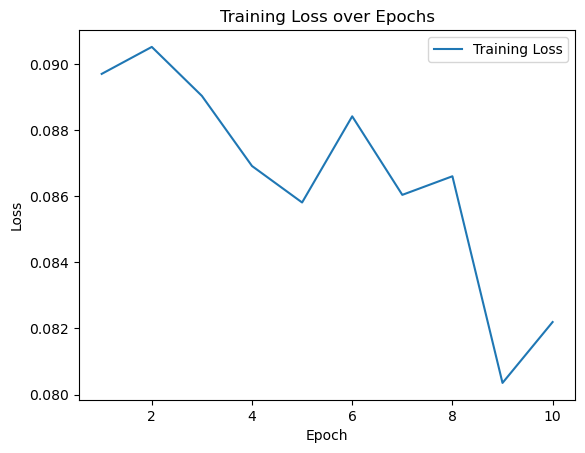

In [102]:
# Visualize the training loss and accuracy
import matplotlib.pyplot as plt

# Plot training loss over epochs
plt.figure()
plt.plot(range(1, num_epochs + 1), train_losses, label='Training Loss')
plt.title('Training Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

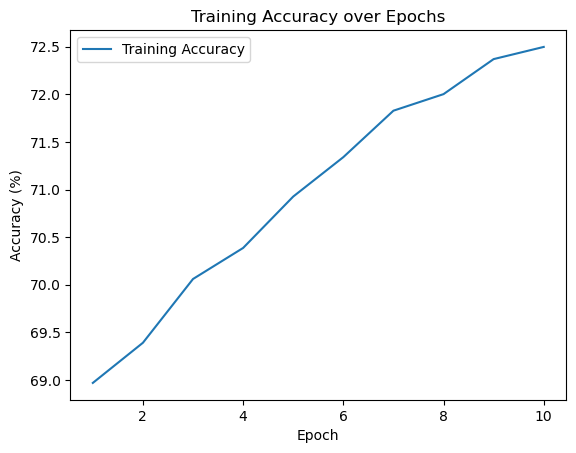

In [103]:
# Plot training accuracy over epochs
plt.figure()
plt.plot(range(1, num_epochs + 1), train_accuracies, label='Training Accuracy')
plt.title('Training Accuracy over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy (%)')
plt.legend()
plt.show()

## Evaluating the CNN model

##### **Q21: How do you evaluate the performance of your trained CNN on a test set in PyTorch?**


In [104]:
# Set the model to evaluation mode
model.eval()

# Initialize variables to track correct predictions and total samples
correct = 0
total = 0

# Disable gradient calculation for evaluation
with torch.no_grad():
    for data in test_loader:
        images, labels = data
        # Forward pass
        outputs = model(images)
        # Get predictions
        _, predicted = torch.max(outputs.data, 1)
        # Update total and correct counts
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

# Calculate accuracy
test_accuracy = 100 * correct / total
print(f'Accuracy on the test set: {test_accuracy:.2f}%')

Accuracy on the test set: 73.22%


##### **Q22: How do you calculate and visualize a confusion matrix for your CNN model's predictions in PyTorch?**


In [105]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

all_labels = []
all_predictions = []

with torch.no_grad():
    for data in test_loader:
        images, labels = data
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        all_labels.extend(labels.cpu().numpy())
        all_predictions.extend(predicted.cpu().numpy())

# Compute confusion matrix
cm = confusion_matrix(all_labels, all_predictions)

# Define class names (CIFAR-10 classes)
class_names = ['plane', 'car', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

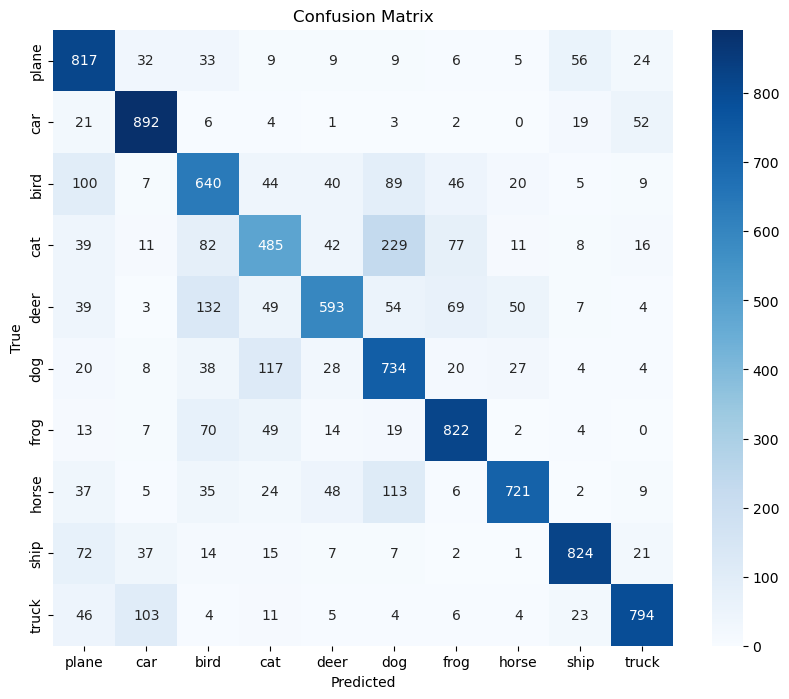

In [106]:
# Visualize confusion matrix using seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

##### **Q23: How do you detect overfitting during CNN model evaluation by analyzing training and validation losses?**


In [107]:
from torch.utils.data.sampler import SubsetRandomSampler

validation_split = 0.1  # Use 10% for validation
shuffle_dataset = True
random_seed = 42

dataset_size = len(train_set)
indices = list(range(dataset_size))
split = int(np.floor(validation_split * dataset_size))

if shuffle_dataset:
    np.random.seed(random_seed)
    np.random.shuffle(indices)

train_indices, val_indices = indices[split:], indices[:split]

train_sampler = SubsetRandomSampler(train_indices)
valid_sampler = SubsetRandomSampler(val_indices)

train_loader = DataLoader(train_set, batch_size=64, sampler=train_sampler, num_workers=2)
validation_loader = DataLoader(train_set, batch_size=64, sampler=valid_sampler, num_workers=2)

In [108]:
train_losses = []
validation_losses = []

num_epochs = 10

for epoch in range(num_epochs):
    # Training phase
    model.train()
    running_train_loss = 0.0
    for data in train_loader:
        inputs, labels = data

        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_train_loss += loss.item()

    epoch_train_loss = running_train_loss / len(train_loader)
    train_losses.append(epoch_train_loss)

    # Validation phase
    model.eval()
    running_val_loss = 0.0
    with torch.no_grad():
        for data in validation_loader:
            inputs, labels = data
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            running_val_loss += loss.item()

    epoch_val_loss = running_val_loss / len(validation_loader)
    validation_losses.append(epoch_val_loss)

    print(f'Epoch {epoch + 1}, Training Loss: {epoch_train_loss:.3f}, Validation Loss: {epoch_val_loss:.3f}')

Epoch 1, Training Loss: 0.777, Validation Loss: 0.758
Epoch 2, Training Loss: 0.768, Validation Loss: 0.761
Epoch 3, Training Loss: 0.766, Validation Loss: 0.771
Epoch 4, Training Loss: 0.762, Validation Loss: 0.756
Epoch 5, Training Loss: 0.752, Validation Loss: 0.758
Epoch 6, Training Loss: 0.753, Validation Loss: 0.764
Epoch 7, Training Loss: 0.746, Validation Loss: 0.753
Epoch 8, Training Loss: 0.742, Validation Loss: 0.783
Epoch 9, Training Loss: 0.735, Validation Loss: 0.729
Epoch 10, Training Loss: 0.727, Validation Loss: 0.769


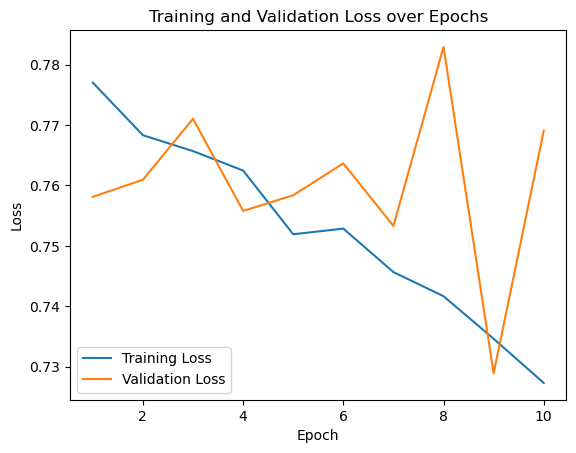

In [109]:
plt.figure()
plt.plot(range(1, num_epochs + 1), train_losses, label='Training Loss')
plt.plot(range(1, num_epochs + 1), validation_losses, label='Validation Loss')
plt.title('Training and Validation Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

##### **Q24: How do you visualize the classification results of a CNN model on test data in PyTorch?**


In [110]:
# Get some random test images
dataiter = iter(test_loader)
images, labels = next(dataiter)

# Get predictions
outputs = model(images)
_, predicted = torch.max(outputs, 1)

# Define class names
class_names = ['plane', 'car', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

# Function to show images
def imshow(img):
    img = img / 2 + 0.5  # Unnormalize if images were normalized
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.axis('off')
    plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.49473685..1.5492939].


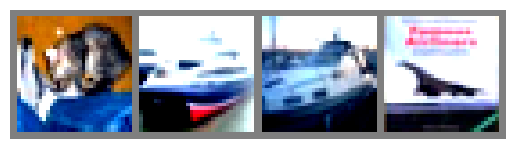

In [111]:
# Show images
imshow(torchvision.utils.make_grid(images[:4]))

In [112]:
# Print true and predicted labels
print('GroundTruth:', ' '.join(f'{class_names[labels[j]]}' for j in range(4)))
print('Predicted:  ', ' '.join(f'{class_names[predicted[j]]}' for j in range(4)))

GroundTruth: cat ship ship plane
Predicted:   cat car car plane


##### **Q25: How do you compute evaluation metrics for your CNN model's predictions in PyTorch?**

In [113]:
from sklearn.metrics import classification_report

all_labels = []
all_predictions = []

with torch.no_grad():
    for data in test_loader:
        images, labels = data
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        all_labels.extend(labels.cpu().numpy())
        all_predictions.extend(predicted.cpu().numpy())

report = classification_report(all_labels, all_predictions, target_names=class_names)
print('Classification Report:')
print(report)

Classification Report:
              precision    recall  f1-score   support

       plane       0.70      0.85      0.77      1000
         car       0.81      0.90      0.85      1000
        bird       0.73      0.58      0.65      1000
         cat       0.65      0.47      0.54      1000
        deer       0.76      0.64      0.70      1000
         dog       0.59      0.75      0.66      1000
        frog       0.80      0.81      0.80      1000
       horse       0.78      0.81      0.80      1000
        ship       0.89      0.81      0.85      1000
       truck       0.79      0.86      0.82      1000

    accuracy                           0.75     10000
   macro avg       0.75      0.75      0.74     10000
weighted avg       0.75      0.75      0.74     10000



## Visualizing intermediate outputs and filters

##### **Q26: How do you extract and visualize the output of a specific layer in your CNN model during inference in PyTorch?**


In [114]:
# Create a dictionary to store the outputs
activation = {}

def get_activation(name):
    def hook(model, input, output):
        activation[name] = output.detach()
    return hook

# Register the forward hook on the desired layer, e.g., 'conv1'
model.conv1.register_forward_hook(get_activation('conv1'))

In [115]:
model.eval()

# Get a sample input image
dataiter = iter(test_loader)
images, labels = next(dataiter)
image = images[0].unsqueeze(0)  # Add batch dimension

# Perform a forward pass
output = model(image)

# Retrieve the activation
conv1_activation = activation['conv1']

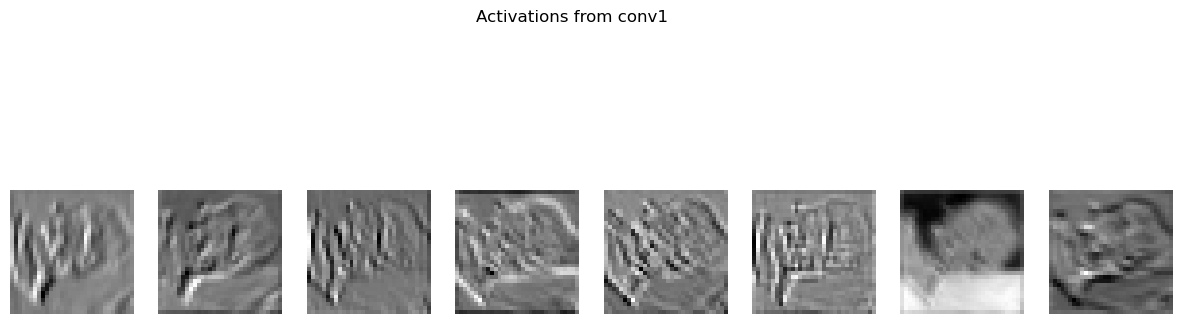

In [116]:
# Visualize the output of conv1
fig, axes = plt.subplots(1, 8, figsize=(15, 5))  # First 8 feature maps
for idx in range(8):
    axes[idx].imshow(conv1_activation[0, idx].cpu(), cmap='gray')
    axes[idx].axis('off')
plt.suptitle('Activations from conv1')
plt.show()

##### **Q27: How do you visualize the learned filters of a convolutional layer in a trained CNN model using PyTorch?**


In [117]:
# Access the weights of the first convolutional layer
conv1_weights = model.conv1.weight.data.clone()

# Normalize the weights to [0, 1] range for visualization
min_wt = conv1_weights.min()
max_wt = conv1_weights.max()
conv1_weights = (conv1_weights - min_wt) / (max_wt - min_wt)

# Convert weights to numpy
conv1_weights = conv1_weights.cpu().numpy()

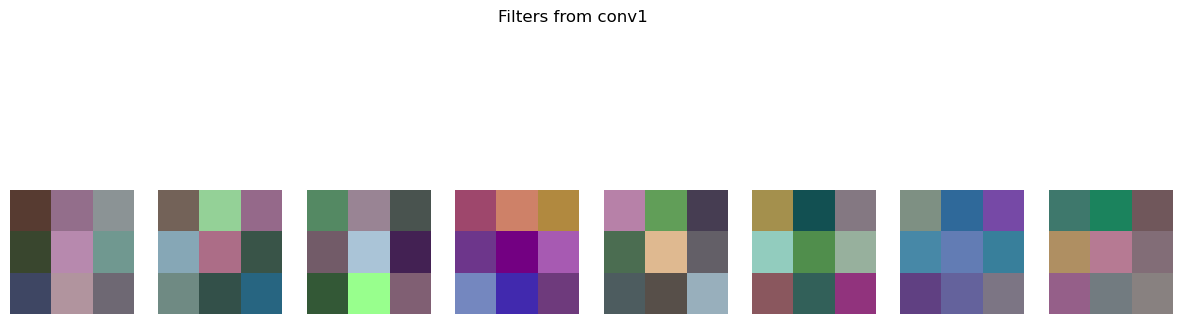

In [118]:
# Visualize the first 8 filters
fig, axes = plt.subplots(1, 8, figsize=(15, 5))
for idx in range(8):
    # For RGB filters, we need to transpose the dimensions to (H, W, C)
    filter_img = np.transpose(conv1_weights[idx], (1, 2, 0))
    axes[idx].imshow(filter_img)
    axes[idx].axis('off')
plt.suptitle('Filters from conv1')
plt.show()

##### **Q28: How do you visualize the feature maps produced by the convolutional layers of a CNN in PyTorch?**


In [119]:
activation = {}

def get_activation(name):
    def hook(model, input, output):
        activation[name] = output.detach()
    return hook

# Register hooks for conv1 and conv2
model.conv1.register_forward_hook(get_activation('conv1'))
model.conv2.register_forward_hook(get_activation('conv2'))

model.eval()
output = model(image)

# Retrieve activations
conv1_activation = activation['conv1']
conv2_activation = activation['conv2']

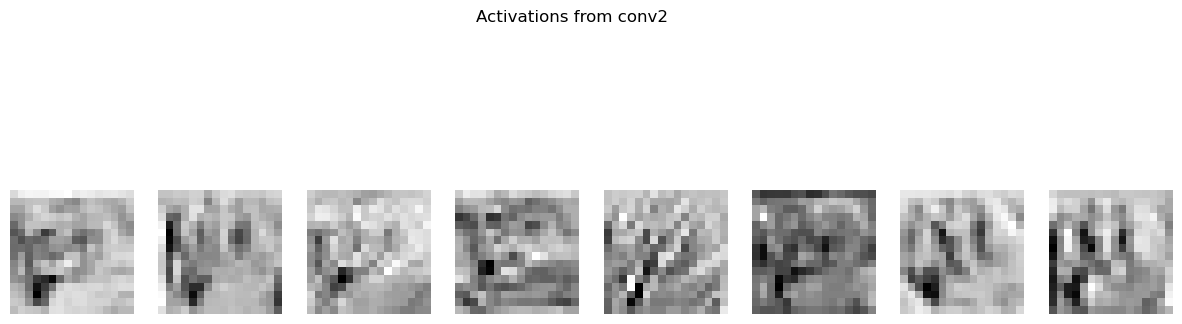

In [120]:
fig, axes = plt.subplots(1, 8, figsize=(15, 5))
for idx in range(8):
    axes[idx].imshow(conv2_activation[0, idx].cpu(), cmap='gray')
    axes[idx].axis('off')
plt.suptitle('Activations from conv2')
plt.show()

##### **Q29: How do you use `matplotlib` to plot and analyze the filters and feature maps of a CNN model in PyTorch?**


In [121]:
# Access weights from a convolutional layer
conv_weights = model.conv1.weight.data.clone().cpu()

# Normalize weights
conv_weights = (conv_weights - conv_weights.min()) / (conv_weights.max() - conv_weights.min())

# Convert to numpy
conv_weights = conv_weights.numpy()

# Determine number of filters
num_filters = conv_weights.shape[0]

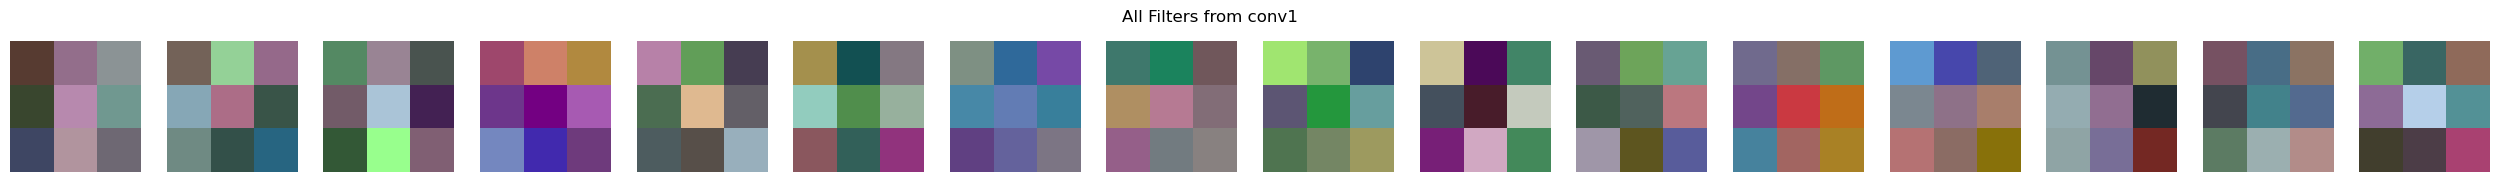

In [122]:
# Plot all filters
fig, axes = plt.subplots(1, num_filters, figsize=(num_filters * 2, 2))
for idx in range(num_filters):
    filter_img = np.transpose(conv_weights[idx], (1, 2, 0))
    axes[idx].imshow(filter_img)
    axes[idx].axis('off')
plt.suptitle('All Filters from conv1')
plt.show()

In [123]:
# Choose a layer and get its activation
layer_activation = activation['conv1']  # or 'conv2'

# Convert to CPU and numpy
feature_maps = layer_activation[0].cpu().numpy()

# Determine number of feature maps
num_feature_maps = feature_maps.shape[0]

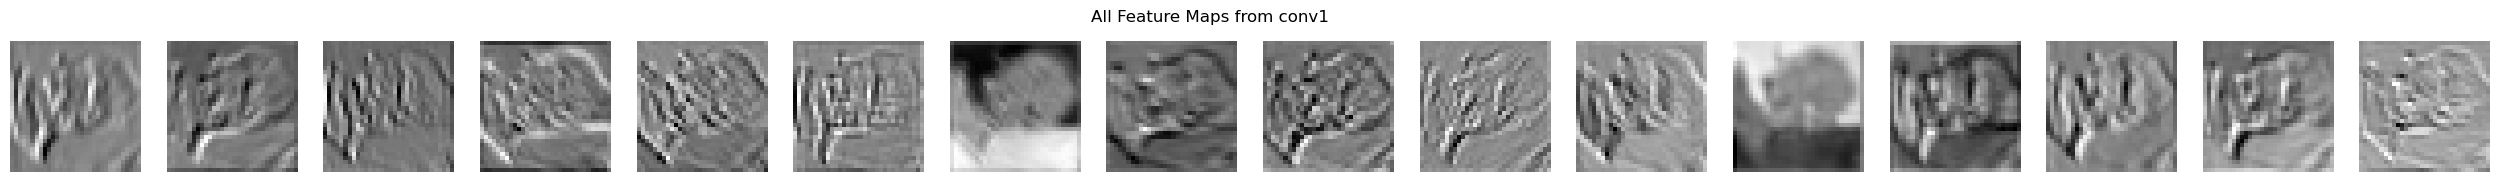

In [124]:
# Plot feature maps
fig, axes = plt.subplots(1, num_feature_maps, figsize=(num_feature_maps * 2, 2))
for idx in range(num_feature_maps):
    axes[idx].imshow(feature_maps[idx], cmap='gray')
    axes[idx].axis('off')
plt.suptitle('All Feature Maps from conv1')
plt.show()

##### **Q30: How do you visualize the output of the last convolutional layer before flattening in your CNN model using PyTorch?**

In [125]:
activation = {}
model.conv2.register_forward_hook(get_activation('conv2'))

model.eval()
output = model(image)

conv2_activation = activation['conv2']

# Visualize feature maps from conv2
num_feature_maps = min(conv2_activation.shape[1], 16)

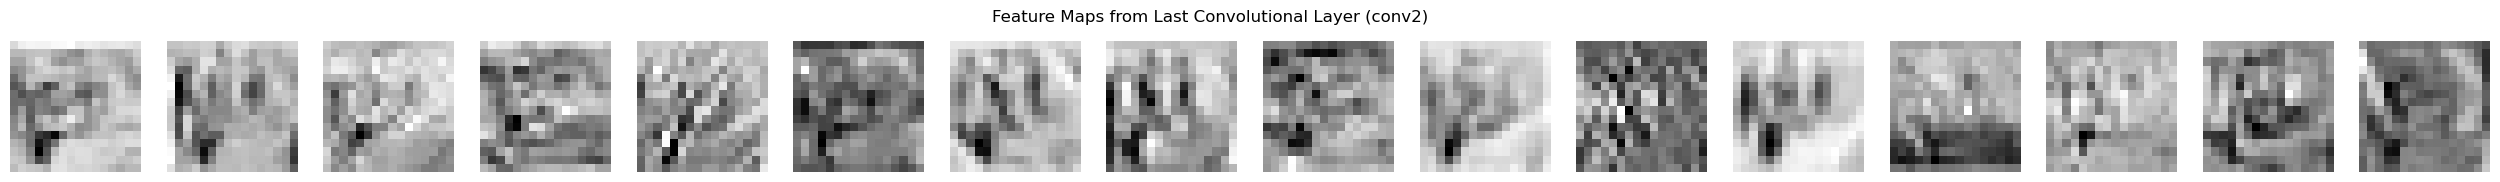

In [126]:
fig, axes = plt.subplots(1, num_feature_maps, figsize=(num_feature_maps * 2, 2))
for idx in range(num_feature_maps):
    axes[idx].imshow(conv2_activation[0, idx].cpu(), cmap='gray')
    axes[idx].axis('off')
plt.suptitle('Feature Maps from Last Convolutional Layer (conv2)')
plt.show()

## Improving the model with regularization

##### **Q31: How do you implement dropout in a CNN model in PyTorch to reduce overfitting?**


In [127]:
class SimpleCNN(nn.Module):
    def __init__(self, dropout_p=0.5):
        super(SimpleCNN, self).__init__()
        
        self.conv1 = nn.Conv2d(3, 16, 3, padding=1)
        self.conv2 = nn.Conv2d(16, 32, 3, padding=1)
        self.pool = nn.MaxPool2d(2, 2)
        
        # Dropout layers
        self.dropout = nn.Dropout(p=dropout_p)
        
        self.fc1 = nn.Linear(32 * 8 * 8, 120)
        self.fc2 = nn.Linear(120, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(x.size(0), -1)
        
        # Apply dropout
        x = self.dropout(x)
        
        x = F.relu(self.fc1(x))
        
        # Apply dropout
        x = self.dropout(x)
        
        x = self.fc2(x)
        return x

##### **Q32: How do you apply weight decay to your CNN model in PyTorch using an optimizer?**


In [128]:
criterion = nn.CrossEntropyLoss()

# Define the optimizer with weight decay
optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9, weight_decay=1e-4)

##### **Q33: How do you implement data augmentation to improve generalization of your CNN model in PyTorch?**


In [129]:
transform = transforms.Compose([
    transforms.Resize((32, 32)),             # Ensure consistent image size
    transforms.RandomCrop(32, padding=4),    # Randomly crop with padding
    transforms.RandomHorizontalFlip(),       # Random horizontal flip
    transforms.RandomRotation(15),           # Random rotation
    transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2),
    transforms.ToTensor(),
    transforms.Normalize((0.4914, 0.4822, 0.4465),
                         (0.247, 0.243, 0.261))
])

train_set = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)

test_transform = transforms.Compose([
    transforms.Resize((32, 32)),
    transforms.ToTensor(),
    transforms.Normalize((0.4914, 0.4822, 0.4465),
                         (0.247, 0.243, 0.261))
])

test_set = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=test_transform)

Files already downloaded and verified
Files already downloaded and verified


##### **Q34: How do you adjust hyperparameters to optimize CNN performance in PyTorch?**


In [130]:
# Split the dataset into training and validation sets
validation_split = 0.1
shuffle_dataset = True
random_seed = 42

dataset_size = len(train_set)
indices = list(range(dataset_size))
split = int(np.floor(validation_split * dataset_size))

if shuffle_dataset:
    np.random.seed(random_seed)
    np.random.shuffle(indices)

train_indices, val_indices = indices[split:], indices[:split]

In [131]:
from sklearn.model_selection import ParameterGrid

# Define hyperparameter grid
param_grid = {
    'lr': [0.01, 0.001],
    'batch_size': [64, 128],
    'weight_decay': [0, 1e-4],
    'dropout_p': [0.3, 0.5],
}

# Create all combinations of hyperparameters
grid = list(ParameterGrid(param_grid))

In [133]:
best_val_accuracy = 0.0
best_params = None

for params in grid:
    print(f"Testing with parameters: {params}")
    
    # Create data loaders for the current batch size
    train_sampler = SubsetRandomSampler(train_indices)
    valid_sampler = SubsetRandomSampler(val_indices)
    train_loader = DataLoader(train_set, batch_size=params['batch_size'], sampler=train_sampler, num_workers=2)
    validation_loader = DataLoader(train_set, batch_size=params['batch_size'], sampler=valid_sampler, num_workers=2)
    
    # Initialize the model, criterion, and optimizer with current hyperparameters
    model = SimpleCNN(dropout_p=params['dropout_p'])
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.SGD(model.parameters(), lr=params['lr'], momentum=0.9, weight_decay=params['weight_decay'])
    
    num_epochs = 5 
    for epoch in range(num_epochs):
        # Training phase
        model.train()
        running_train_loss = 0.0
        for data in train_loader:
            inputs, labels = data
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            running_train_loss += loss.item()
        epoch_train_loss = running_train_loss / len(train_loader)
        
        # Validation phase
        model.eval()
        running_val_loss = 0.0
        correct = 0
        total = 0
        with torch.no_grad():
            for data in validation_loader:
                inputs, labels = data
                outputs = model(inputs)
                loss = criterion(outputs, labels)
                running_val_loss += loss.item()
                _, predicted = torch.max(outputs.data, 1)
                total += labels.size(0)
                correct += (predicted == labels).sum().item()
        epoch_val_loss = running_val_loss / len(validation_loader)
        val_accuracy = 100 * correct / total
        
        print(f"Epoch [{epoch+1}/{num_epochs}], "
              f"Train Loss: {epoch_train_loss:.4f}, "
              f"Val Loss: {epoch_val_loss:.4f}, "
              f"Val Accuracy: {val_accuracy:.2f}%")
    
    # Check if current parameters yield better performance
    if val_accuracy > best_val_accuracy:
        best_val_accuracy = val_accuracy
        best_params = params

print(f"\nBest Parameters: {best_params}")
print(f"Best Validation Accuracy: {best_val_accuracy:.2f}%")

Testing with parameters: {'batch_size': 64, 'dropout_p': 0.3, 'lr': 0.01, 'weight_decay': 0}
Epoch [1/5], Train Loss: 1.8359, Val Loss: 1.5473, Val Accuracy: 42.02%
Epoch [2/5], Train Loss: 1.5692, Val Loss: 1.4496, Val Accuracy: 47.50%
Epoch [3/5], Train Loss: 1.4645, Val Loss: 1.3148, Val Accuracy: 52.28%
Epoch [4/5], Train Loss: 1.3983, Val Loss: 1.2789, Val Accuracy: 53.22%
Epoch [5/5], Train Loss: 1.3492, Val Loss: 1.2583, Val Accuracy: 54.28%
Testing with parameters: {'batch_size': 64, 'dropout_p': 0.3, 'lr': 0.01, 'weight_decay': 0.0001}
Epoch [1/5], Train Loss: 1.8342, Val Loss: 1.6295, Val Accuracy: 40.38%
Epoch [2/5], Train Loss: 1.5882, Val Loss: 1.4564, Val Accuracy: 47.40%
Epoch [3/5], Train Loss: 1.4936, Val Loss: 1.4135, Val Accuracy: 48.88%
Epoch [4/5], Train Loss: 1.4328, Val Loss: 1.3250, Val Accuracy: 52.20%
Epoch [5/5], Train Loss: 1.3887, Val Loss: 1.2618, Val Accuracy: 54.62%
Testing with parameters: {'batch_size': 64, 'dropout_p': 0.3, 'lr': 0.001, 'weight_decay'

##### **Q35: How do you implement early stopping in PyTorch to prevent overfitting during CNN training?**


In [135]:
# Create data loaders
train_sampler = SubsetRandomSampler(train_indices)
valid_sampler = SubsetRandomSampler(val_indices)
train_loader = DataLoader(train_set, batch_size=64, sampler=train_sampler, num_workers=2)
validation_loader = DataLoader(train_set, batch_size=64, sampler=valid_sampler, num_workers=2)

# Initialize the model, criterion, and optimizer
model = SimpleCNN(dropout_p=0.5)
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9, weight_decay=1e-4)

# Early Stopping parameters
num_epochs = 50
patience = 5
best_val_loss = float('inf')
epochs_no_improve = 0

train_losses = []
val_losses = []
best_model_wts = None

for epoch in range(num_epochs):
    # Training phase
    model.train()
    running_train_loss = 0.0
    for data in train_loader:
        inputs, labels = data
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_train_loss += loss.item()
    epoch_train_loss = running_train_loss / len(train_loader)
    train_losses.append(epoch_train_loss)
    
    # Validation phase
    model.eval()
    running_val_loss = 0.0
    correct = 0
    total = 0
    with torch.no_grad():
        for data in validation_loader:
            inputs, labels = data
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            running_val_loss += loss.item()
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    epoch_val_loss = running_val_loss / len(validation_loader)
    val_losses.append(epoch_val_loss)
    val_accuracy = 100 * correct / total
    
    print(f"Epoch [{epoch+1}/{num_epochs}], "
          f"Train Loss: {epoch_train_loss:.4f}, "
          f"Val Loss: {epoch_val_loss:.4f}, "
          f"Val Accuracy: {val_accuracy:.2f}%")
    
    # Check for improvement
    if epoch_val_loss < best_val_loss:
        best_val_loss = epoch_val_loss
        epochs_no_improve = 0
        # Save the best model weights
        best_model_wts = model.state_dict().copy()
    else:
        epochs_no_improve += 1
    
    # Early stopping
    if epochs_no_improve >= patience:
        print('Early stopping!')
        break

Epoch [1/50], Train Loss: 2.2102, Val Loss: 2.0239, Val Accuracy: 27.18%
Epoch [2/50], Train Loss: 1.9964, Val Loss: 1.8638, Val Accuracy: 33.42%
Epoch [3/50], Train Loss: 1.8674, Val Loss: 1.7479, Val Accuracy: 36.84%
Epoch [4/50], Train Loss: 1.7874, Val Loss: 1.6680, Val Accuracy: 39.86%
Epoch [5/50], Train Loss: 1.7263, Val Loss: 1.6085, Val Accuracy: 41.90%
Epoch [6/50], Train Loss: 1.6813, Val Loss: 1.5764, Val Accuracy: 43.38%
Epoch [7/50], Train Loss: 1.6553, Val Loss: 1.5479, Val Accuracy: 44.54%
Epoch [8/50], Train Loss: 1.6343, Val Loss: 1.5161, Val Accuracy: 44.78%
Epoch [9/50], Train Loss: 1.6030, Val Loss: 1.5035, Val Accuracy: 45.82%
Epoch [10/50], Train Loss: 1.5848, Val Loss: 1.4890, Val Accuracy: 46.48%
Epoch [11/50], Train Loss: 1.5667, Val Loss: 1.4660, Val Accuracy: 47.02%
Epoch [12/50], Train Loss: 1.5549, Val Loss: 1.4412, Val Accuracy: 47.72%
Epoch [13/50], Train Loss: 1.5357, Val Loss: 1.4306, Val Accuracy: 48.10%
Epoch [14/50], Train Loss: 1.5235, Val Loss: 1.

Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7d9350d88360>
Traceback (most recent call last):
  File "/home/fellmir/anaconda3/lib/python3.12/site-packages/torch/utils/data/dataloader.py", line 1477, in __del__
    Exception ignored in: self._shutdown_workers()<function _MultiProcessingDataLoaderIter.__del__ at 0x7d9350d88360>

  File "/home/fellmir/anaconda3/lib/python3.12/site-packages/torch/utils/data/dataloader.py", line 1460, in _shutdown_workers
Traceback (most recent call last):
  File "/home/fellmir/anaconda3/lib/python3.12/site-packages/torch/utils/data/dataloader.py", line 1477, in __del__
    if w.is_alive():    
self._shutdown_workers() 
   File "/home/fellmir/anaconda3/lib/python3.12/site-packages/torch/utils/data/dataloader.py", line 1460, in _shutdown_workers
      if w.is_alive(): 
    ^ ^ ^ ^  ^^^^^^^^^^^^^^^^^
^  File "/home/fellmir/anaconda3/lib/python3.12/multiprocessing/process.py", line 160, in is_alive
^    ^
assert self._parent_pid 

Epoch [50/50], Train Loss: 1.2756, Val Loss: 1.1251, Val Accuracy: 60.26%


In [136]:
# Load the best model weights
model.load_state_dict(best_model_wts)

# Save the best model
torch.save(model.state_dict(), 'best_model.pth')
print('Training complete.')

Training complete.


##### **Q36: How do you analyze the impact of regularization techniques on the validation loss during CNN training in PyTorch?**

In [137]:
# Lists to save metrics
train_losses_no_reg = []
val_losses_no_reg = []

train_losses_with_reg = []
val_losses_with_reg = []

In [138]:
# Model with no regularization:
class SimpleCNN_NoReg(nn.Module):
    def __init__(self):
        super(SimpleCNN_NoReg, self).__init__()
        
        self.conv1 = nn.Conv2d(3, 16, 3, padding=1)
        self.conv2 = nn.Conv2d(16, 32, 3, padding=1)
        self.pool = nn.MaxPool2d(2, 2)
        
        self.fc1 = nn.Linear(32 * 8 * 8, 120)
        self.fc2 = nn.Linear(120, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(x.size(0), -1)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x

# Initialize the model, criterion, and optimizer
model_no_reg = SimpleCNN_NoReg()
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model_no_reg.parameters(), lr=0.001, momentum=0.9)

# Training loop
num_epochs = 20
for epoch in range(num_epochs):
    # Training phase
    model_no_reg.train()
    running_train_loss = 0.0
    for data in train_loader:
        inputs, labels = data
        optimizer.zero_grad()
        outputs = model_no_reg(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_train_loss += loss.item()
    epoch_train_loss = running_train_loss / len(train_loader)
    train_losses_no_reg.append(epoch_train_loss)
    
    # Validation phase
    model_no_reg.eval()
    running_val_loss = 0.0
    with torch.no_grad():
        for data in validation_loader:
            inputs, labels = data
            outputs = model_no_reg(inputs)
            loss = criterion(outputs, labels)
            running_val_loss += loss.item()
    epoch_val_loss = running_val_loss / len(validation_loader)
    val_losses_no_reg.append(epoch_val_loss)
    
    print(f"Epoch [{epoch+1}/{num_epochs}], "
          f"Train Loss: {epoch_train_loss:.4f}, "
          f"Val Loss: {epoch_val_loss:.4f}")

Epoch [1/20], Train Loss: 2.0816, Val Loss: 1.9063
Epoch [2/20], Train Loss: 1.8039, Val Loss: 1.7059
Epoch [3/20], Train Loss: 1.6620, Val Loss: 1.6538
Epoch [4/20], Train Loss: 1.5710, Val Loss: 1.5432
Epoch [5/20], Train Loss: 1.5189, Val Loss: 1.4972
Epoch [6/20], Train Loss: 1.4673, Val Loss: 1.4399
Epoch [7/20], Train Loss: 1.4293, Val Loss: 1.4296
Epoch [8/20], Train Loss: 1.3959, Val Loss: 1.3980
Epoch [9/20], Train Loss: 1.3624, Val Loss: 1.3674
Epoch [10/20], Train Loss: 1.3299, Val Loss: 1.3176
Epoch [11/20], Train Loss: 1.3083, Val Loss: 1.2957
Epoch [12/20], Train Loss: 1.2741, Val Loss: 1.2601
Epoch [13/20], Train Loss: 1.2471, Val Loss: 1.2716
Epoch [14/20], Train Loss: 1.2201, Val Loss: 1.2272
Epoch [15/20], Train Loss: 1.2080, Val Loss: 1.2092
Epoch [16/20], Train Loss: 1.1788, Val Loss: 1.1980
Epoch [17/20], Train Loss: 1.1627, Val Loss: 1.1935
Epoch [18/20], Train Loss: 1.1451, Val Loss: 1.1502
Epoch [19/20], Train Loss: 1.1336, Val Loss: 1.1405
Epoch [20/20], Train 

In [139]:
model_with_reg = SimpleCNN(dropout_p=0.5)
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model_with_reg.parameters(), lr=0.001, momentum=0.9, weight_decay=1e-4)

# Training loop
train_losses_with_reg = []
val_losses_with_reg = []

for epoch in range(num_epochs):
    # Training phase
    model_with_reg.train()
    running_train_loss = 0.0
    for data in train_loader:
        inputs, labels = data
        optimizer.zero_grad()
        outputs = model_with_reg(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_train_loss += loss.item()
    epoch_train_loss = running_train_loss / len(train_loader)
    train_losses_with_reg.append(epoch_train_loss)
    
    # Validation phase
    model_with_reg.eval()
    running_val_loss = 0.0
    with torch.no_grad():
        for data in validation_loader:
            inputs, labels = data
            outputs = model_with_reg(inputs)
            loss = criterion(outputs, labels)
            running_val_loss += loss.item()
    epoch_val_loss = running_val_loss / len(validation_loader)
    val_losses_with_reg.append(epoch_val_loss)
    
    print(f"Epoch [{epoch+1}/{num_epochs}], "
          f"Train Loss: {epoch_train_loss:.4f}, "
          f"Val Loss: {epoch_val_loss:.4f}")

Epoch [1/20], Train Loss: 2.1852, Val Loss: 2.0127
Epoch [2/20], Train Loss: 1.9983, Val Loss: 1.8833
Epoch [3/20], Train Loss: 1.8759, Val Loss: 1.7376
Epoch [4/20], Train Loss: 1.7889, Val Loss: 1.6660
Epoch [5/20], Train Loss: 1.7246, Val Loss: 1.6209
Epoch [6/20], Train Loss: 1.6941, Val Loss: 1.5839
Epoch [7/20], Train Loss: 1.6603, Val Loss: 1.5383
Epoch [8/20], Train Loss: 1.6278, Val Loss: 1.5264
Epoch [9/20], Train Loss: 1.6077, Val Loss: 1.5038
Epoch [10/20], Train Loss: 1.5820, Val Loss: 1.4561
Epoch [11/20], Train Loss: 1.5551, Val Loss: 1.4451
Epoch [12/20], Train Loss: 1.5375, Val Loss: 1.4318
Epoch [13/20], Train Loss: 1.5191, Val Loss: 1.4015
Epoch [14/20], Train Loss: 1.5040, Val Loss: 1.3958
Epoch [15/20], Train Loss: 1.4885, Val Loss: 1.3896
Epoch [16/20], Train Loss: 1.4761, Val Loss: 1.3670
Epoch [17/20], Train Loss: 1.4574, Val Loss: 1.3546
Epoch [18/20], Train Loss: 1.4505, Val Loss: 1.3523
Epoch [19/20], Train Loss: 1.4404, Val Loss: 1.3208
Epoch [20/20], Train 

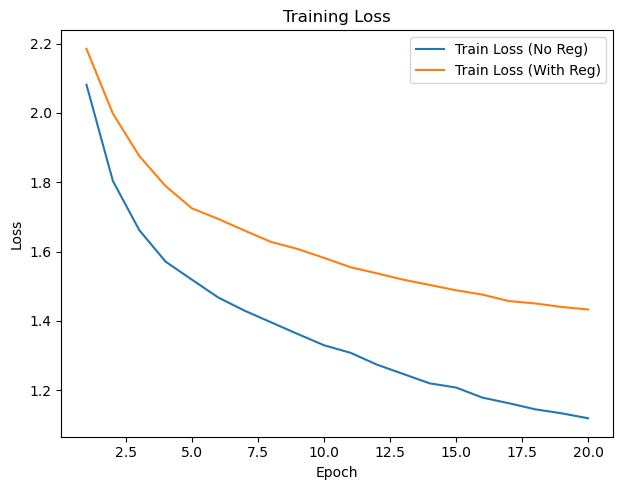

In [140]:
epochs = range(1, num_epochs + 1)

plt.figure(figsize=(12, 5))

# Training Loss Comparison
plt.subplot(1, 2, 1)
plt.plot(epochs, train_losses_no_reg, label='Train Loss (No Reg)')
plt.plot(epochs, train_losses_with_reg, label='Train Loss (With Reg)')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss')
plt.legend()

plt.tight_layout()
plt.show()

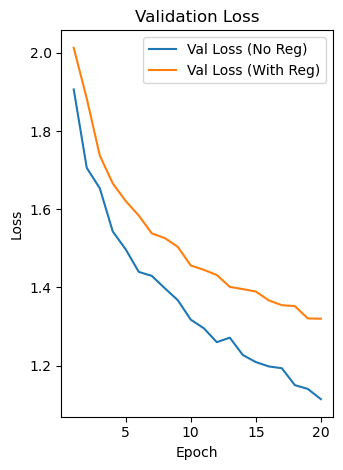

In [141]:
plt.subplot(1, 2, 2)
plt.plot(epochs, val_losses_no_reg, label='Val Loss (No Reg)')
plt.plot(epochs, val_losses_with_reg, label='Val Loss (With Reg)')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Validation Loss')
plt.legend()

plt.tight_layout()
plt.show()

In [142]:
import shutil
import os

if os.path.exists('data'):
    shutil.rmtree('data')
    print("Folder 'data' has been deleted.")
else:
    print("Folder 'data' does not exist.")

if os.path.exists('best_model.pth'):
    os.remove('best_model.pth')
    print("File 'best_model.pth' has been deleted.")
else:
    print("File 'best_model.pth' does not exist.")

Folder 'data' has been deleted.
File 'best_model.pth' has been deleted.


## Conclusion